## Assignment 3.2: Time Series Modeling

In [99]:
# Packages needed for modeling and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from math import sqrt
import re
import os
import string
import nltk 
from nltk.corpus import stopwords
import category_encoders as cat_encoder
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.dates as mdates

In [3]:
# Importing Dataset to Dataframe
df = pd.read_csv('us_retail_sales.csv', parse_dates=['YEAR'])

In [4]:
# Top 5 rows and column headers
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992-01-01,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993-01-01,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994-01-01,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995-01-01,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996-01-01,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [5]:
# Rows and Columns of dataset
df.shape

(30, 13)

In [6]:
# Data Types of columns
df.dtypes

YEAR    datetime64[ns]
JAN              int64
FEB              int64
MAR              int64
APR              int64
MAY              int64
JUN              int64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
dtype: object

In [7]:
# Statistics of numercal data
df.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000
mean,304803.833333,305200.900000,307533.566667,306719.600000,309205.633333,311406.966667,304375.448276,305451.965517,306078.206897,307310.62069,307794.896552,308099.620690
std,97687.399232,96682.043053,100002.422696,98207.161171,99541.010078,101057.212178,92471.103673,92504.808195,93008.417392,92836.64419,92702.551770,91784.061634
min,146925.000000,147223.000000,146805.000000,148032.000000,149010.000000,149800.000000,150761.000000,151067.000000,152588.000000,153521.00000,153583.000000,155614.000000
25%,228856.750000,231470.750000,233019.000000,233235.500000,234976.500000,235967.250000,233948.000000,236566.000000,237481.000000,237553.00000,240544.000000,245485.000000
50%,303486.000000,304592.500000,308655.500000,311233.500000,308690.000000,312957.000000,313520.000000,310046.000000,310673.000000,310479.00000,306675.000000,308413.000000
75%,371527.000000,377008.500000,379221.000000,376797.500000,382698.250000,383839.750000,373554.000000,372489.000000,372505.000000,373663.00000,373914.000000,377032.000000
max,520162.000000,504458.000000,559871.000000,562269.000000,548987.000000,550782.000000,481627.000000,483716.000000,493327.000000,493991.00000,488652.000000,484782.000000


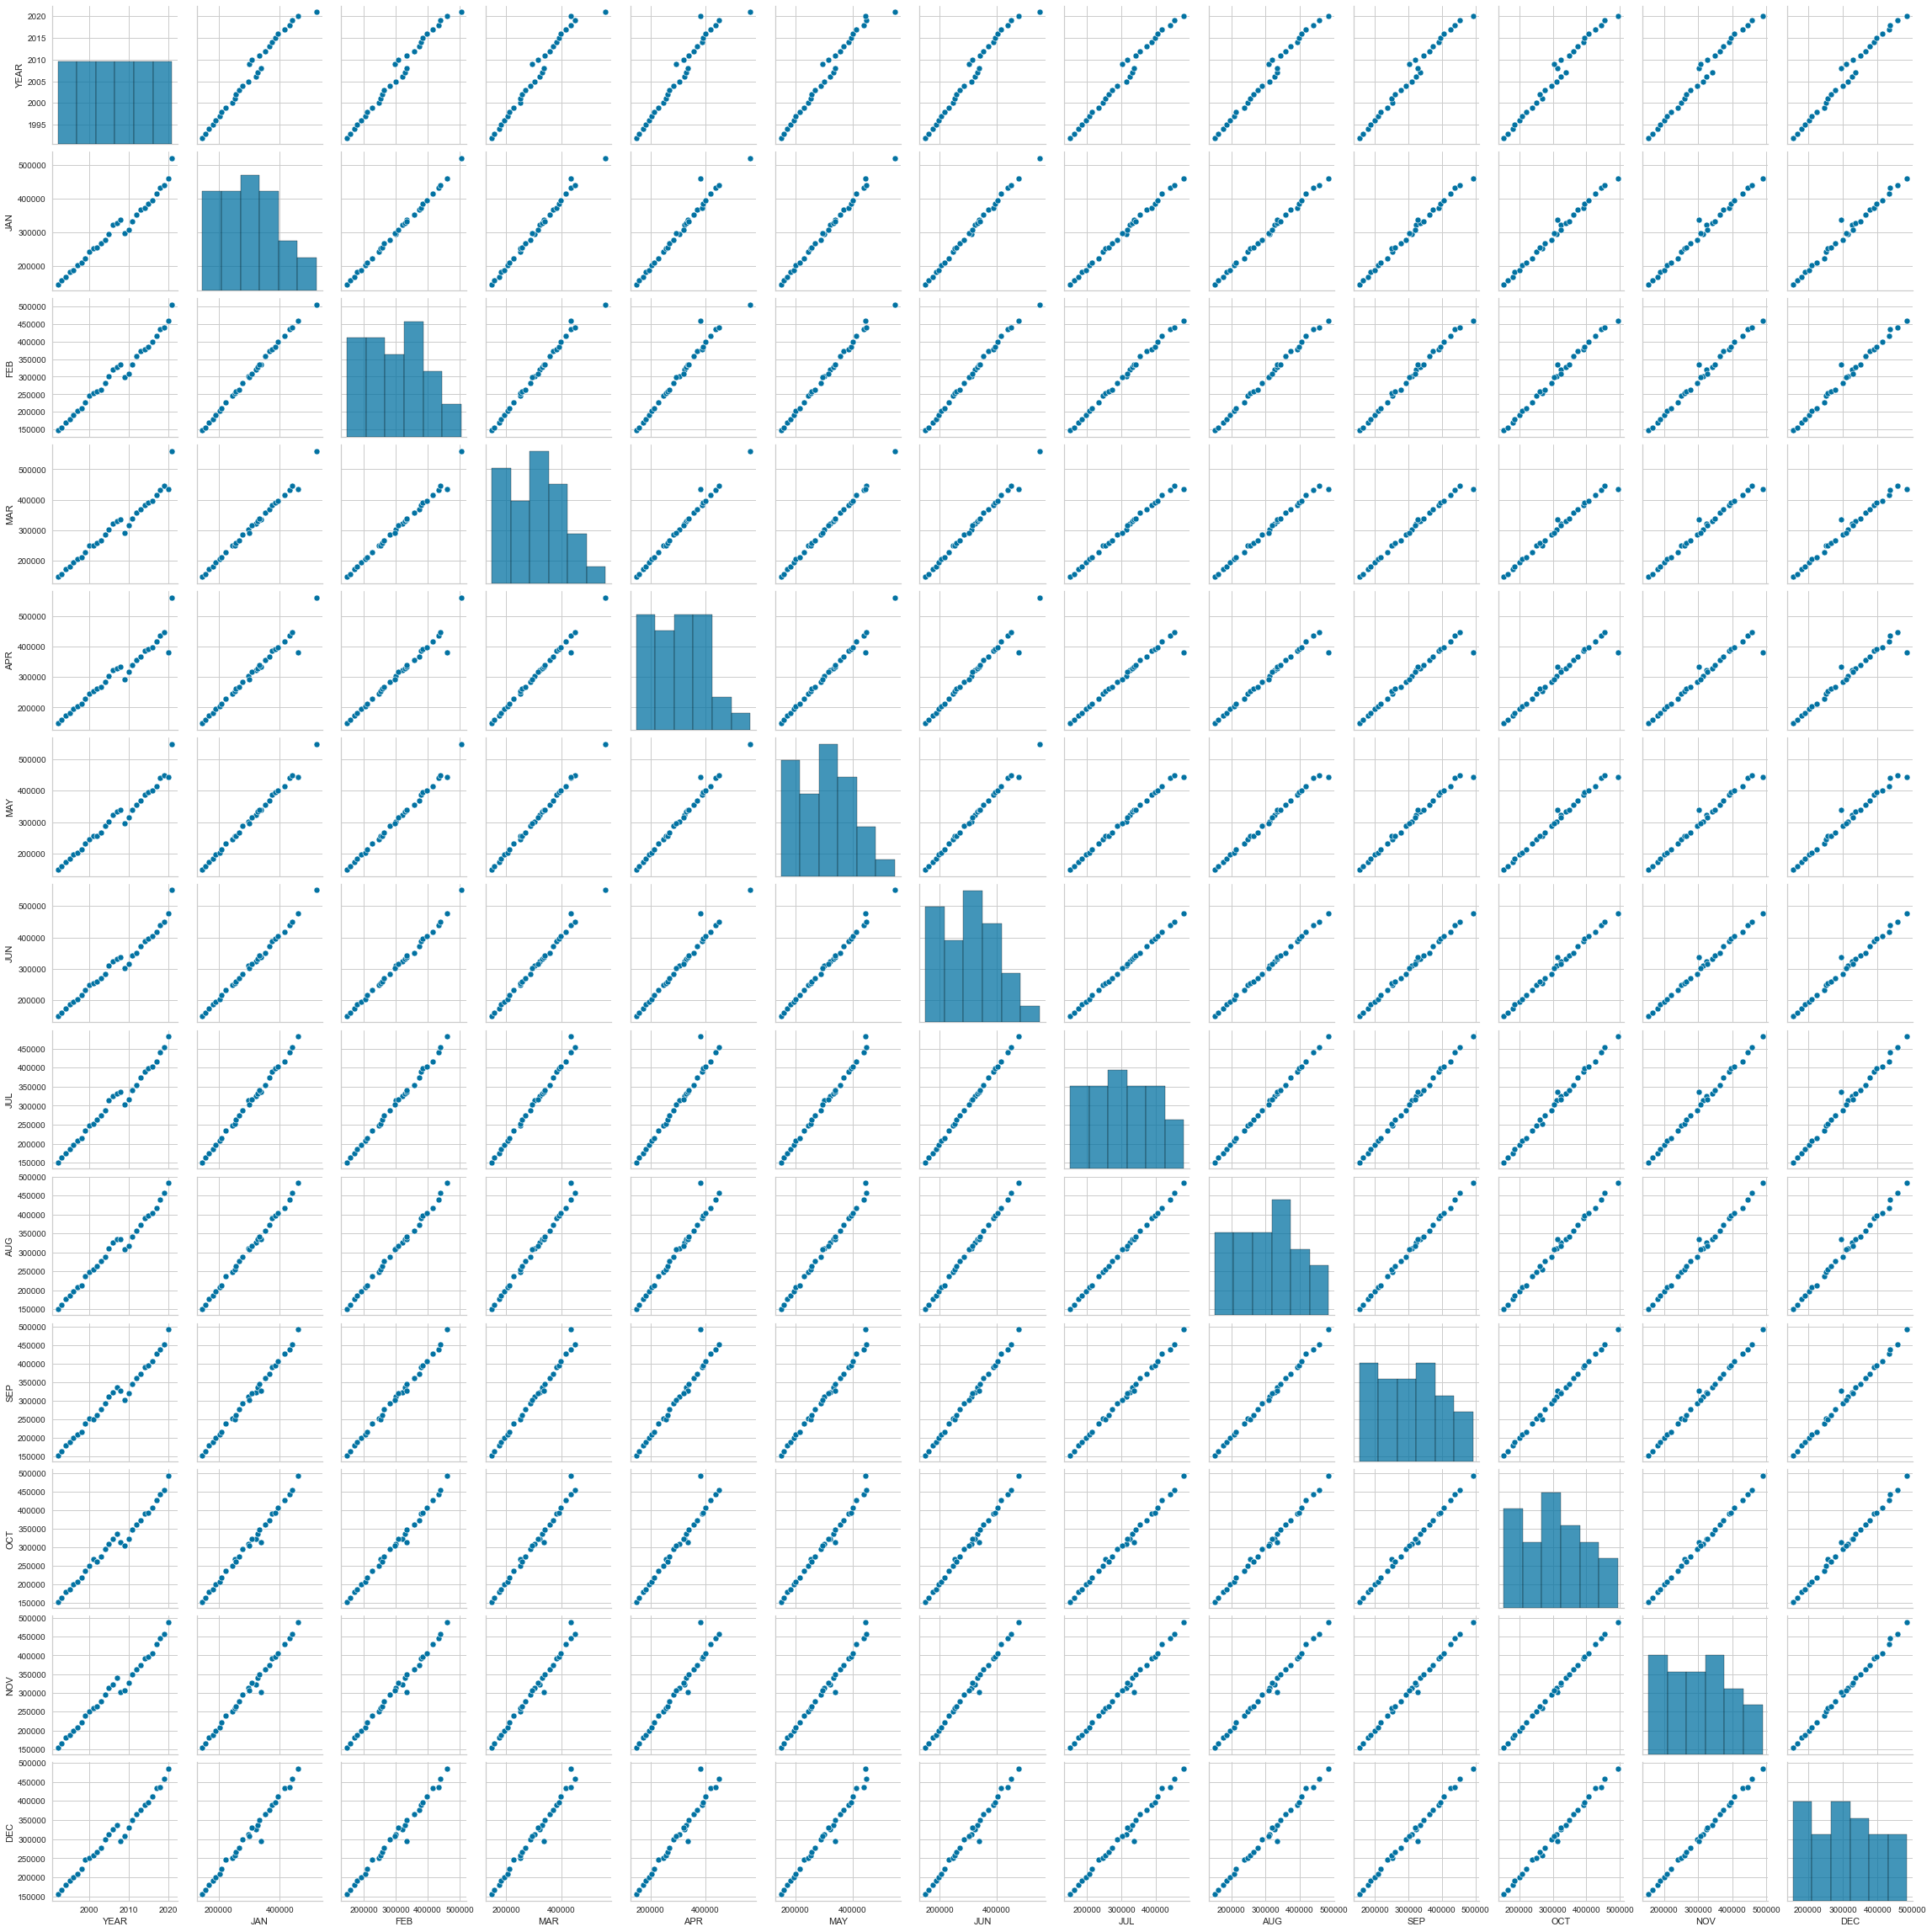

In [7]:
# Plotting Pairplot via SNS to get a glimpse
sns.pairplot(df)

In [9]:
# Plotting the Mean of Each Row in respect to the Year
df['mean'] = df.iloc[:, 0:30].mean(axis=1)

C:\Users\qvant\AppData\Local\Temp/ipykernel_30580/1786115313.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df['mean'] = df.iloc[:, 0:30].mean(axis=1)


In [10]:
# Top 5 rows and column headers
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,mean
0,1992-01-01,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0,150410.750000
1,1993-01-01,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0,161358.666667
2,1994-01-01,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0,175271.666667
3,1995-01-01,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0,185017.833333
4,1996-01-01,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0,196312.166667


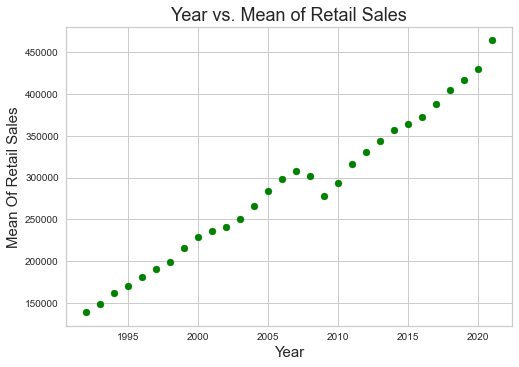

In [14]:
# Plotting Scatter with Mean of Months per Retail Sales against Year
plt.scatter(df['YEAR'],df['mean'],c='green')
plt.title("Year vs. Mean of Retail Sales", fontsize=18)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Mean Of Retail Sales",fontsize=15)
plt.grid(True)
plt.show()

# It has been shown that Retail Sales has increased almost linearly ever year besides 2008 as this was when the stock market
# crash occurred. I expect less retail sales occurred since stocks plummeted.

In [74]:
# Importing Dataset to Dataframe
df2 = pd.read_csv('us_retail_sales.csv', parse_dates=['YEAR'])

In [75]:
print(df2)

         YEAR     JAN     FEB     MAR     APR     MAY     JUN       JUL  \
0  1992-01-01  146925  147223  146805  148032  149010  149800  150761.0   
1  1993-01-01  157555  156266  154752  158979  160605  160127  162816.0   
2  1994-01-01  167518  169649  172766  173106  172329  174241  174781.0   
3  1995-01-01  182413  179488  181013  181686  183536  186081  185431.0   
4  1996-01-01  189135  192266  194029  194744  196205  196136  196187.0   
5  1997-01-01  202371  204286  204990  203399  201699  204675  207014.0   
6  1998-01-01  209666  209552  210832  213633  214639  216337  214841.0   
7  1999-01-01  223997  226250  227417  229037  231235  231903  233948.0   
8  2000-01-01  243436  247133  249825  245831  246201  248160  247176.0   
9  2001-01-01  252654  252704  250328  254763  255218  254022  252997.0   
10 2002-01-01  256307  257670  257059  261333  257573  259786  262769.0   
11 2003-01-01  267230  263188  267820  267197  267362  270396  273352.0   
12 2004-01-01  278913  28

In [77]:
df2.index = pd.to_datetime(df2['YEAR'], format='%Y-%m-%d')

In [36]:
del df2['YEAR']

In [78]:
df2.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')

In [80]:
df2.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,,
1992-01-01,1992-01-01,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1993-01-01,1993-01-01,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
1994-01-01,1994-01-01,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
1995-01-01,1995-01-01,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
1996-01-01,1996-01-01,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [81]:
train = df2[df2.index < pd.to_datetime("2020-07-01", format='%Y-%m-%d')]
test = df2[df2.index > pd.to_datetime("2020-07-01", format='%Y-%m-%d')]

In [101]:
x = df2[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y = df2['YEAR']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [87]:
# Utilizing Linear Regression
model = LinearRegression()

In [88]:
model.fit(x_train, y_train)

LinearRegression()

In [89]:
print(model.coef_)

[ 1.28419350e+12 -3.04250400e+12  3.16281859e+11  9.60042149e+11
 -1.81795645e+12  1.42299489e+13 -1.82322674e+13  8.15063803e+12
  1.03169814e+12 -7.54419591e+11 -2.09317189e+12  2.86054289e+12]


In [90]:
print(model.intercept_)

2.501861836436818e+17


In [94]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coefficient'])

,Coefficient
JAN,1.284194e+12
FEB,-3.042504e+12
MAR,3.162819e+11
APR,9.600421e+11
MAY,-1.817956e+12
JUN,1.422995e+13
JUL,-1.823227e+13
AUG,8.150638e+12
SEP,1.031698e+12
OCT,-7.544196e+11


In [95]:
x_test = x_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [96]:
predictions = model.predict(x_test)

In [97]:
##RMSE

np.sqrt(metrics.mean_squared_error(y_test, predictions))

UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

In [ ]:
## Hello Professor, I struggled on this one. Apperciate any guidance. 